In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import seaborn as sns
import random
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv1D, GlobalMaxPooling2D

tf.logging.set_verbosity(tf.logging.ERROR)

In [2]:
# Data Processing
# This file has 9000 samples per class and 2 classes (Signal, Background)

dataset = "ZTraining.csv"
categories = ["Background", "Signal"]
samples_class = 25000

In [3]:
# Loading data
print("\n Loading data from database file...")
features = np.loadtxt(dataset, delimiter = ',', skiprows=1,
                            usecols = (0,1,2,3,4,5,6,7,8,9), unpack=True) #.astype(np.float32)
labels = np.loadtxt(dataset, delimiter = ',', skiprows=1, dtype = 'str', 
                            usecols = (10), unpack=True)


 Loading data from database file...


In [4]:
class_num = np.array(labels)
features = features.T

In [5]:
print("\n Generating training and test data...")
x_train = np.concatenate((
            features[:(samples_class-5000)],
            features[samples_class:(2*samples_class-5000)]),
            axis=0)
x_test = np.concatenate((
            features[(samples_class-5000):samples_class],
            features[(2*samples_class-5000):2*samples_class]),
            axis=0)

y_train = np.concatenate((
            class_num[:(samples_class-5000)],
            class_num[samples_class:(2*samples_class-5000)]),
            axis=0)
y_test = np.concatenate((
            class_num[(samples_class-5000):samples_class],
            class_num[(2*samples_class-5000):2*samples_class]),
            axis=0)

print("\n Total samples:    {} ".format(len(labels)))
print("\n Training samples: {} ".format(len(y_train)))
print("\n Test samples:     {} ".format(len(y_test)))


 Generating training and test data...

 Total samples:    50000 

 Training samples: 40000 

 Test samples:     10000 


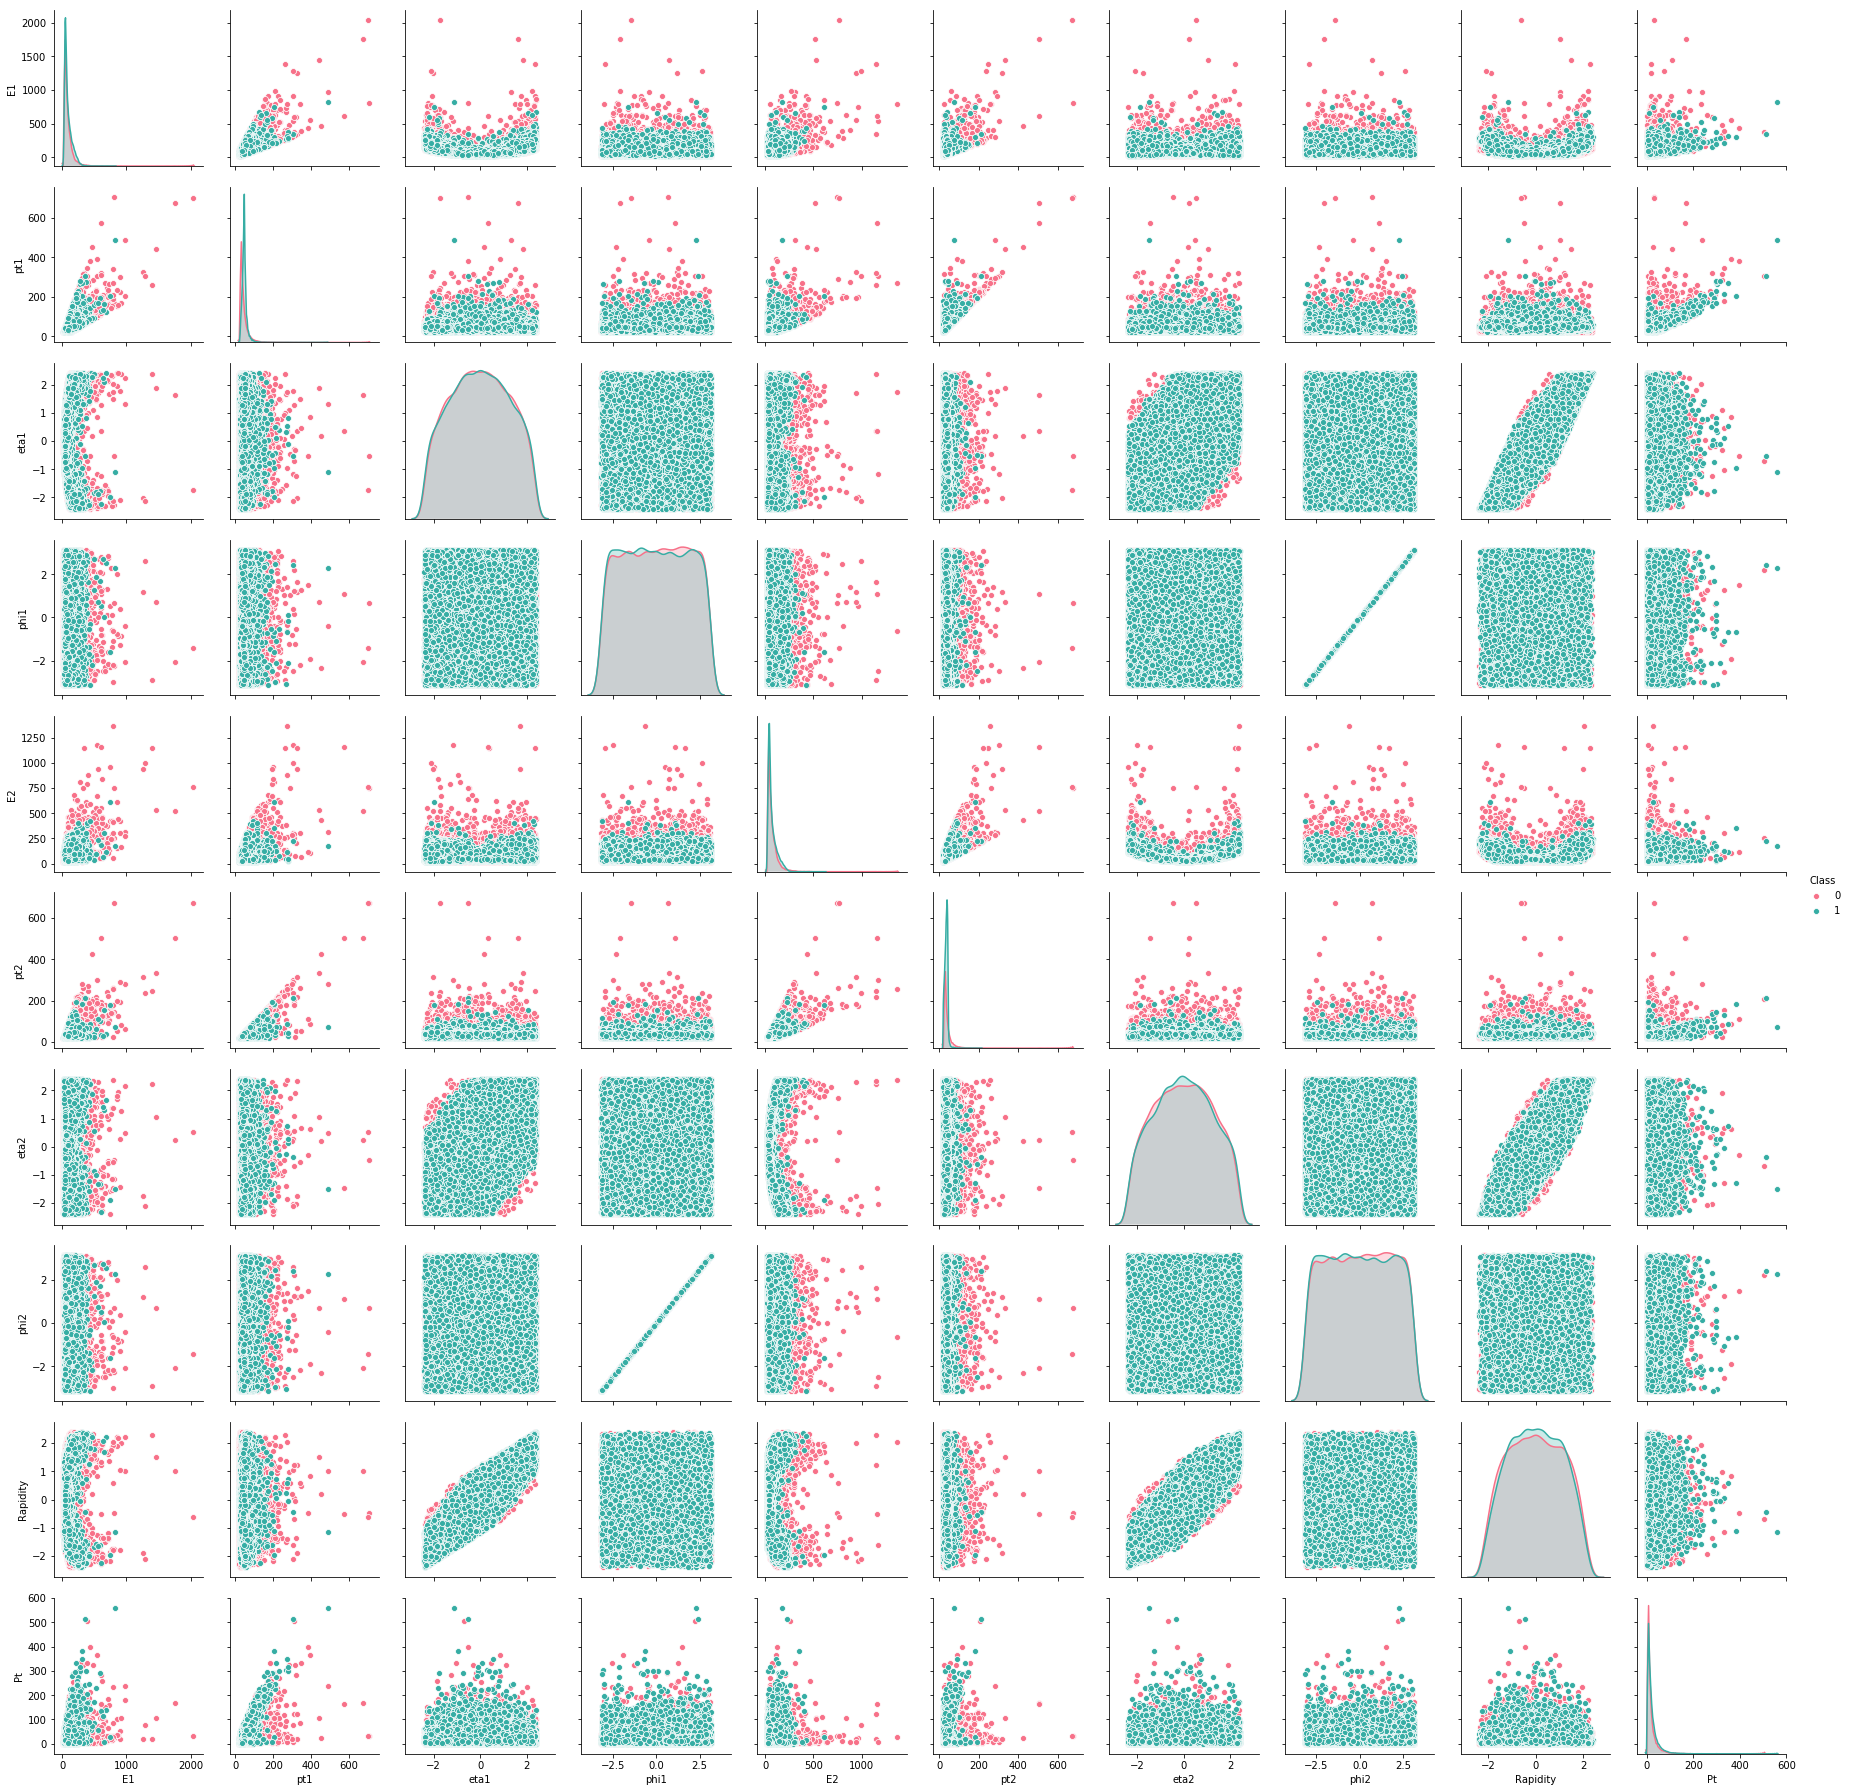

In [6]:
# Searching for correlation between the features
Dataset = pd.read_csv('ZTraining.csv')
sns_plot1 = sns.pairplot(Dataset, hue = 'Class', palette="husl", vars=['E1','pt1','eta1','phi1',
                                                                       'E2','pt2','eta2','phi2',
                                                                       'Rapidity','Pt'])
sns_plot1.savefig("Correlations.png")

In [7]:
# Suffle data inside training_data so that it is not in the same loading order
random.shuffle(x_train)
random.shuffle(y_train)
random.shuffle(x_test)
random.shuffle(y_test)

In [9]:
#===============================================================================
#======================== Model Building =======================================
#===============================================================================
x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)

epochs = 10
num_features = 10
num_classes = 2
batch_size = 32

In [10]:
# Build model
print("\n Building model...")
model = Sequential()
model.add(Dense(256, input_shape=(10,), activation='relu')) # Input = Number of Features
model.add(Dense(256, activation='relu'))
model.add(Dense(num_classes,activation=tf.nn.softmax)) # Output Layer with 2 neurons

print("\n Compiling model...")
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

print(model.summary())

print("\n Fitting model...")
history = model.fit(x_train, y_train, epochs = epochs, batch_size = batch_size, validation_data = (x_test, y_test))


 Building model...

 Compiling model...
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 256)               2816      
_________________________________________________________________
dense_1 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 514       
Total params: 69,122
Trainable params: 69,122
Non-trainable params: 0
_________________________________________________________________
None

 Fitting model...
Train on 40000 samples, validate on 10000 samples
Epoch 1/10
40000/40000 [==============================] - 6s 138us/sample - loss: 0.6938 - acc: 0.5019 - val_loss: 0.6931 - val_acc: 0.5089
Epoch 2/10
40000/40000 [==============================] - 4s 102us/sample - loss: 0.6932 - acc: 0.4994 - val_loss: 0.6933 - val_acc: 0.5015
Epoch 3

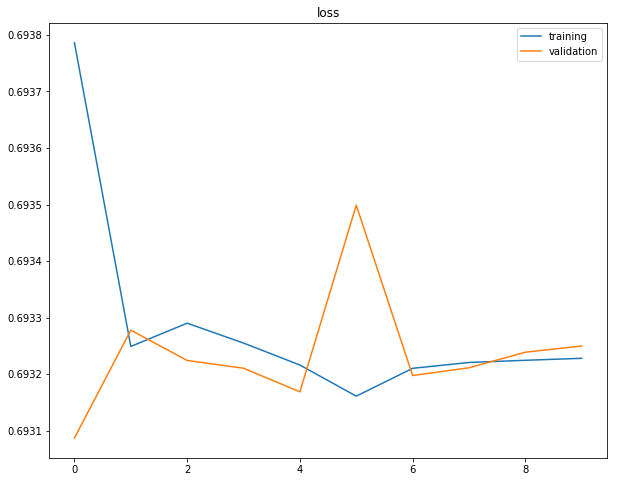

In [11]:
plt.figure(figsize=(10,8))
plt.plot(history.epoch,history.history['loss'], label='training')
plt.plot(history.epoch,history.history['val_loss'], label='validation')
plt.title('loss')
plt.legend(loc='best')
plt.show()

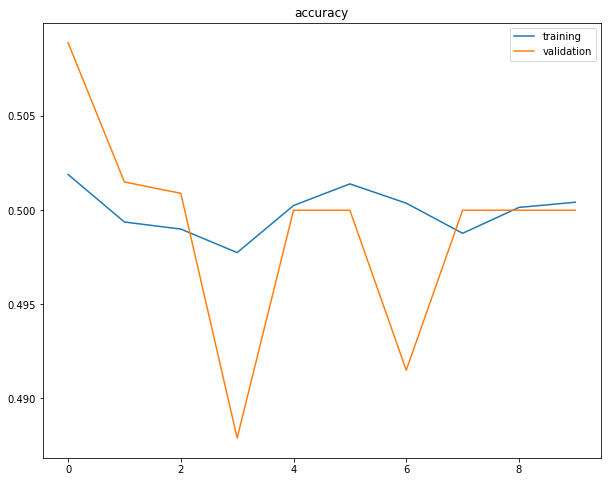

In [12]:
plt.figure(figsize=(10,8))
plt.plot(history.epoch,history.history['acc'], label='training')
plt.plot(history.epoch,history.history['val_acc'], label='validation')
plt.title('accuracy')
plt.legend(loc='best')
plt.show()

In [ ]:
# Searching for correlation between the features
Dataset = pd.read_csv('ZTraining.csv')
sns_plot1 = sns.pairplot(Dataset, hue = 'Class', palette="husl", vars=['E1','pt1','eta1','phi1',
                                                                       'E2','pt2','eta2','phi2',
                                                                       'Rapidity','Pt'])
#sns_plot1.savefig("Correlations.png")